# Keras Callbacks and Functional API

In [8]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
(X_train_t, y_train), (X_test_t, y_test) = cifar10.load_data()

X_train_t = X_train_t.astype('float32') / 255.
X_test_t = X_test_t.astype('float32') / 255.

X_train = X_train_t.reshape(len(X_train_t), 32*32*3)
X_test = X_test_t.reshape(len(X_test_t), 32*32*3)

In [10]:
print("Training set:")
print("Tensor images shape:\t", X_train_t.shape)
print("Flat images shape:\t", X_train.shape)
print("Labels shape:\t\t", y_train.shape)

Training set:
Tensor images shape:	 (50000, 32, 32, 3)
Flat images shape:	 (50000, 3072)
Labels shape:		 (50000, 1)


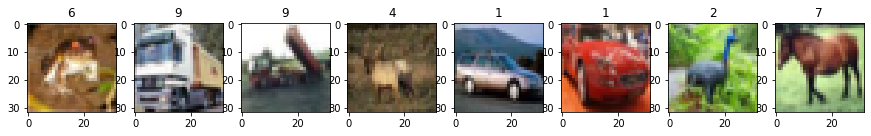

In [11]:
plt.figure(figsize=(15, 4))
for i in range(0, 8):
    plt.subplot(1, 8, i+1)
    plt.imshow(X_train[i].reshape(32, 32, 3))
    plt.title(y_train[i, 0])

## Callbacks on a simple model

In [12]:
outpath='/tmp/tensorboard/cifar/'

early_stopper = EarlyStopping(monitor='val_accuracy', patience=10)
tensorboard = TensorBoard(outpath, histogram_freq=1)
checkpointer = ModelCheckpoint(outpath+'weights_epoch_{epoch:02d}_val_accuracy_{val_accuracy:.2f}.hdf5',
                               monitor='val_acc')

In [13]:
model = Sequential([
    Dense(1024, activation='relu', input_dim=3072),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_split=0.1,
          callbacks=[early_stopper,
                     tensorboard,
                     checkpointer])

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 3s 76us/sample - loss: 2.3814 - accuracy: 0.2518 - val_loss: 1.9331 - val_accuracy: 0.2866
Epoch 2/10
45000/45000 [==============================] - 3s 64us/sample - loss: 1.7919 - accuracy: 0.3570 - val_loss: 1.8552 - val_accuracy: 0.3382
Epoch 3/10
45000/45000 [==============================] - 3s 65us/sample - loss: 1.6969 - accuracy: 0.3944 - val_loss: 1.7650 - val_accuracy: 0.3862
Epoch 4/10
45000/45000 [==============================] - 3s 64us/sample - loss: 1.6273 - accuracy: 0.4187 - val_loss: 1.5638 - val_accuracy: 0.4454
Epoch 5/10
45000/45000 [==============================] - 3s 64us/sample - loss: 1.5723 - accuracy: 0.4424 - val_loss: 1.6008 - val_accuracy: 0.4376
Epoch 6/10
45000/45000 [==============================] - 3s 64us/sample - loss: 1.5290 - accuracy: 0.4572 - val_loss: 1.6768 - val_accuracy: 0.4184
Epoch 7/10
45000/45000 [==============================] -

In [ ]:
import os
sorted(os.listdir(outpath))

Now check the tensorboard.

- If using provided instance, just browse to: `http://<your-domain>/tensorboard/`

- If using local, open a terminal, activate the environment and run:
```
tensorboard --logdir=/tmp/tensorboard/cifar/
```
then open a browser at `localhost:6006`

You should see something like this:

![tensorboard.png](../assets/tensorboard.png)

If you can't access port 6006, you can use Local Tunel. Open another terminal and run [localtunnel](https://localtunnel.github.io/www/) on port 6006:
```
lt --port 6006
```
3. Go to the url provided

You should see something like this.

> TIP: if you get an error `lt: command not found` install localtunnel as:
```
sudo npm install -g localtunnel
```

## Exercise 1: Keras functional API

We'e built a model using the `Sequential API` from tensorflow.keras. Keras also offers a [functional API](https://keras.io/getting-started/functional-api-guide/). This API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.

Can you rewrite the model above using the functional API?

In [15]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [19]:
# This returns a tensor
inputs = Input(shape=(3072,))

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Dense(1024, activation='relu')(inputs)
output_2 = Dense(512, activation='relu')(inputs)
predictions = Dense(10, activation='softmax')(output_2)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

In [20]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_split=0.1)

# Final test evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 2s 51us/sample - loss: 2.4732 - accuracy: 0.2469 - val_loss: 1.9079 - val_accuracy: 0.3180
Epoch 2/10
45000/45000 [==============================] - 2s 42us/sample - loss: 1.8352 - accuracy: 0.3428 - val_loss: 1.7581 - val_accuracy: 0.3704
Epoch 3/10
45000/45000 [==============================] - 2s 42us/sample - loss: 1.7421 - accuracy: 0.3765 - val_loss: 1.7916 - val_accuracy: 0.3672
Epoch 4/10
45000/45000 [==============================] - 2s 42us/sample - loss: 1.6763 - accuracy: 0.4062 - val_loss: 1.6803 - val_accuracy: 0.3948
Epoch 5/10
45000/45000 [==============================] - 2s 42us/sample - loss: 1.6360 - accuracy: 0.4214 - val_loss: 1.6808 - val_accuracy: 0.4034
Epoch 6/10
45000/45000 [==============================] - 2s 42us/sample - loss: 1.5964 - accuracy: 0.4327 - val_loss: 1.6452 - val_accuracy: 0.4122
Epoch 7/10
45000/45000 [==============================] -

## Exercise 2: Convolutional Model with Functional API

The above model is a very simple fully connected deep neural network. As we have seen, Convolutional Neural Networks are much more powerful when dealing with images. The original data has shape:

    (N_images, Height, Width, Channels)
    
Can you write a convolutional model using the functional API?

Bonus points if you use callbacks to write data to tensorboard.

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Flatten

## Exrcise 3: Discuss with the person next to you 

1. What are the pros/cons of the sequential API?
- What are the pros/cons of the functional API?
- What are the key differences between a Fully connected and a Convolutional neural network?
- What is a dropout layer? How does it work? Why does it help?
